In [2]:
from dis import dis
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint


class Placa:

    

    def __init__(self, comprimento, largura, discretização) -> None:
        self.comprimento = comprimento
        self.largura = largura
        self.discretização = discretização
        self.pontos = []
        self.erro = 10**-9
        for x in np.arange(0, self.comprimento+self.erro, self.discretização):
            for y in np.arange(0, self.largura+self.erro, self.discretização):
                self.pontos.append([round(x,3), round(y,3)])
        

    def get_points(self):
        return self.pontos
    
    def edge_degrees(self, esquerda=None, direita=None, cima=None, baixo=None):
        for ponto in self.pontos:
            if ponto[0] == 0:
                if ponto[1] == 0:
                    ponto.append((esquerda+baixo)/2)
                elif ponto[1] == self.largura:
                    ponto.append((esquerda+cima)/2)
                else:
                    ponto.append(esquerda)
                    
            elif ponto[0] == self.comprimento:
                if ponto[1] == 0:
                    ponto.append((direita+baixo)/2)
                elif ponto[1] == self.largura:
                    ponto.append((direita+cima)/2)
                else:
                    ponto.append(direita)
                    
            elif ponto[1] == 0:
                if ponto[0] == 0:
                    ponto.append((esquerda+baixo)/2)
                elif ponto[0] == self.comprimento:
                    ponto.append((direita+baixo)/2)
                else:
                    ponto.append(baixo)
            
            elif ponto[1] == self.largura:
                if ponto[0] == 0:
                    ponto.append((esquerda+cima)/2)
                elif ponto[0] == self.comprimento:
                    ponto.append((direita+cima)/2)
                else:
                    ponto.append(cima)
        
        return self.pontos
    
    def distancia(self, p1, p2):
        x1 = p1[0]
        x2 = p2[0]
        y1 = p1[1]
        y2 = p2[1]
        if round(abs(x1-x2), 3) == self.discretização and round(abs(y1-y2), 3) == 0:
            return True
        elif round(abs(x1-x2), 3) == 0 and round(abs(y1-y2), 3) == self.discretização:
            return True
        else:
            return False
        
        
    def descovering_degrees(self):
        
        # DEFINING POINTS
        self.valide_points = []
        self.result_points = []
        self.edge_points = []
        for p in self.pontos:
            if len(p) == 2:
                self.valide_points.append(p.copy())
                self.result_points.append(p.copy())
            else:
                self.edge_points.append(p)
        
        num = 0
        for p in self.valide_points:
            p.append(num)
            num += 1
        
        
        # DEFINING MATRIX AND VECTOR
        matrix_A = []
        for ponto in self.valide_points:
            a = [0 for i in range(len(self.valide_points))]
            a[ponto[2]] = 1
            for p in self.valide_points:
                if self.distancia(ponto, p):
                        a[p[2]] += -1/4
            matrix_A.append(a)
            
        vector_b = []
        for ponto in self.valide_points:
            b = 0
            for p in self.edge_points:
                if self.distancia(ponto, p):
                        b += p[2]/4
            vector_b.append(b)
        
        
        # SAVING RESULTS
        self.matrix_A = matrix_A
        self.vector_b = vector_b
        

        
        # CALCULATING THE ANSWERS
        matrix_A = np.array(matrix_A)
        vector_b = np.array(vector_b)
        inversa_A = np.linalg.inv(matrix_A)
        temperaturas = np.dot(inversa_A, vector_b)
        for i, T in enumerate(temperaturas):
            self.result_points[i].append(T)
        self.result = self.result_points + self.edge_points
        
            
                    
                    

    def plot_points(self, c):
        
        cores = [plt.cm.jet, plt.cm.hot, plt.cm.plasma, plt.cm.magma, plt.cm.OrRd]
        self.descovering_degrees()
        x, y, T = [x[0] for x in self.result], [y[1] for y in self.result], [T[2] for T in self.result]
        if c >= len(cores) or c < 0:
            print("Escolha uma cor entre 0 e 4")
            return None
        print(f"A cor escolhida foi {cores[c].name}")
        

        color = cores[c]
        fig = plt.figure(figsize=(16, 12))
        for i, a in enumerate(range(30,121,30), start=1):
            ax = plt.subplot(2,2,i, projection='3d')
            #ax.scatter(x, y, T)
            surf = ax.plot_trisurf(x, y, T, cmap=color, linewidth=0.2)
            fig.colorbar(surf, shrink=0.5, aspect=5)
            ax.view_init(45, a)
            ax.set_title(f"Placa plana, angulo {a}")
            ax.set_xlabel("Comprimento da placa (m)")
            ax.set_ylabel("Largura da placa (m)")
            ax.set_zlabel("Temperatura da placa")
        
        plt.show()

A cor escolhida foi OrRd


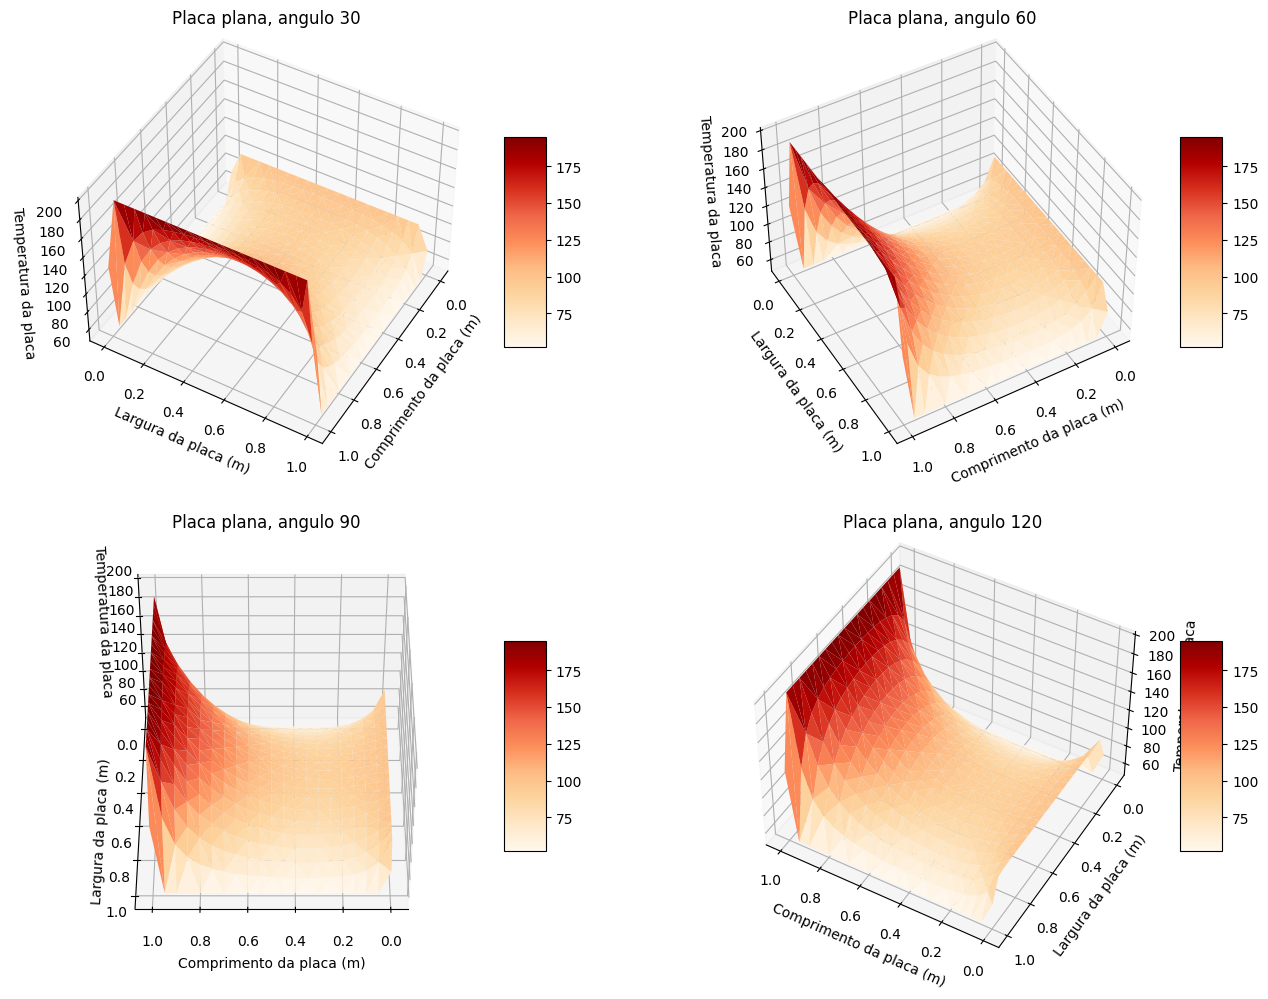

In [3]:


placa = Placa(1, 1, 0.05)


placa.edge_degrees(esquerda=100, direita=200, cima=50, baixo=50)





placa.plot_points(4)

A cor escolhida foi jet


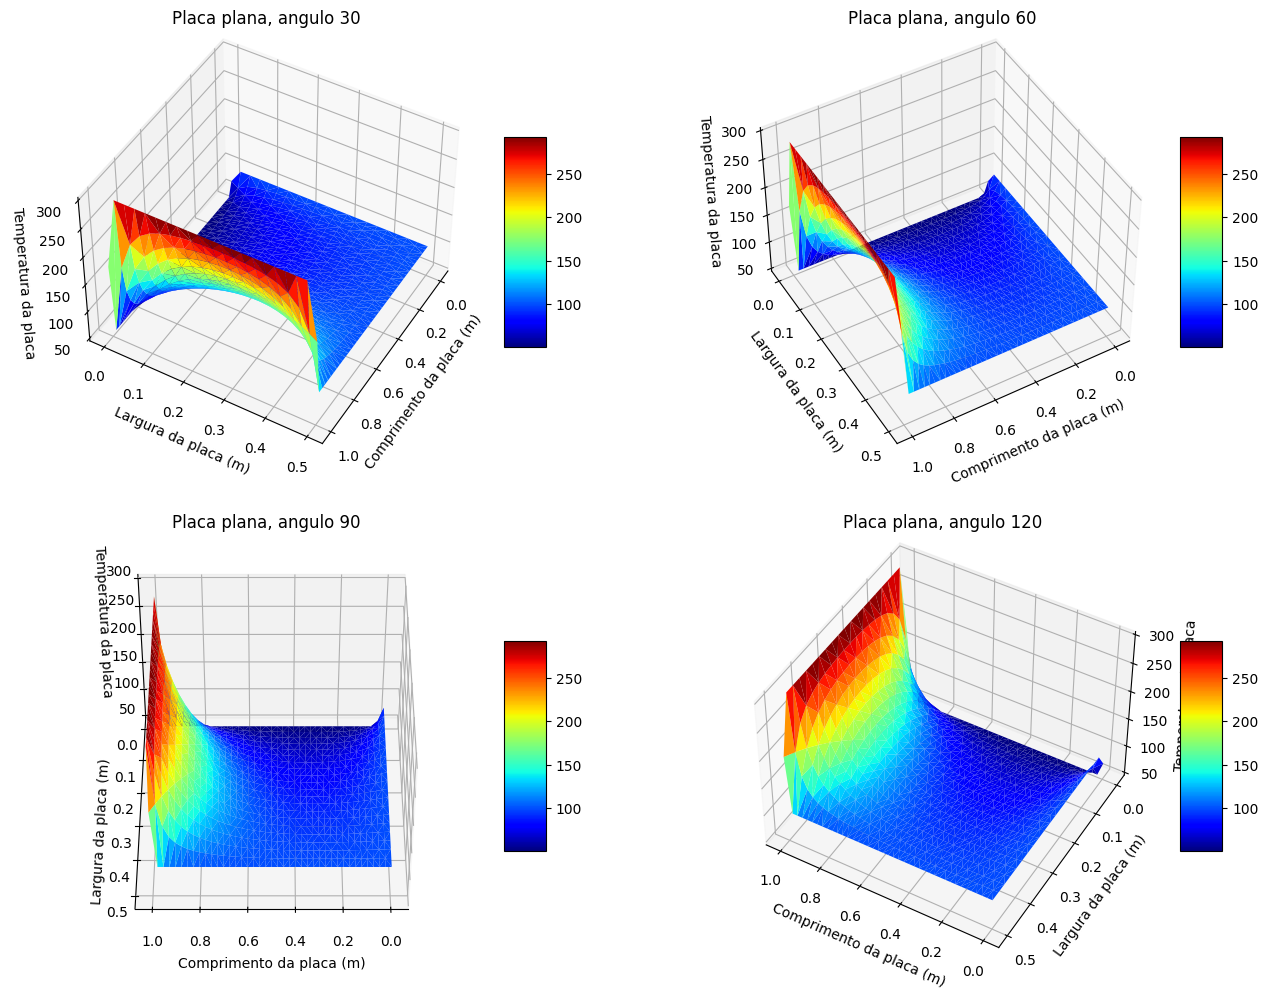

In [13]:
placa.plot_points(0)

A cor escolhida foi hot


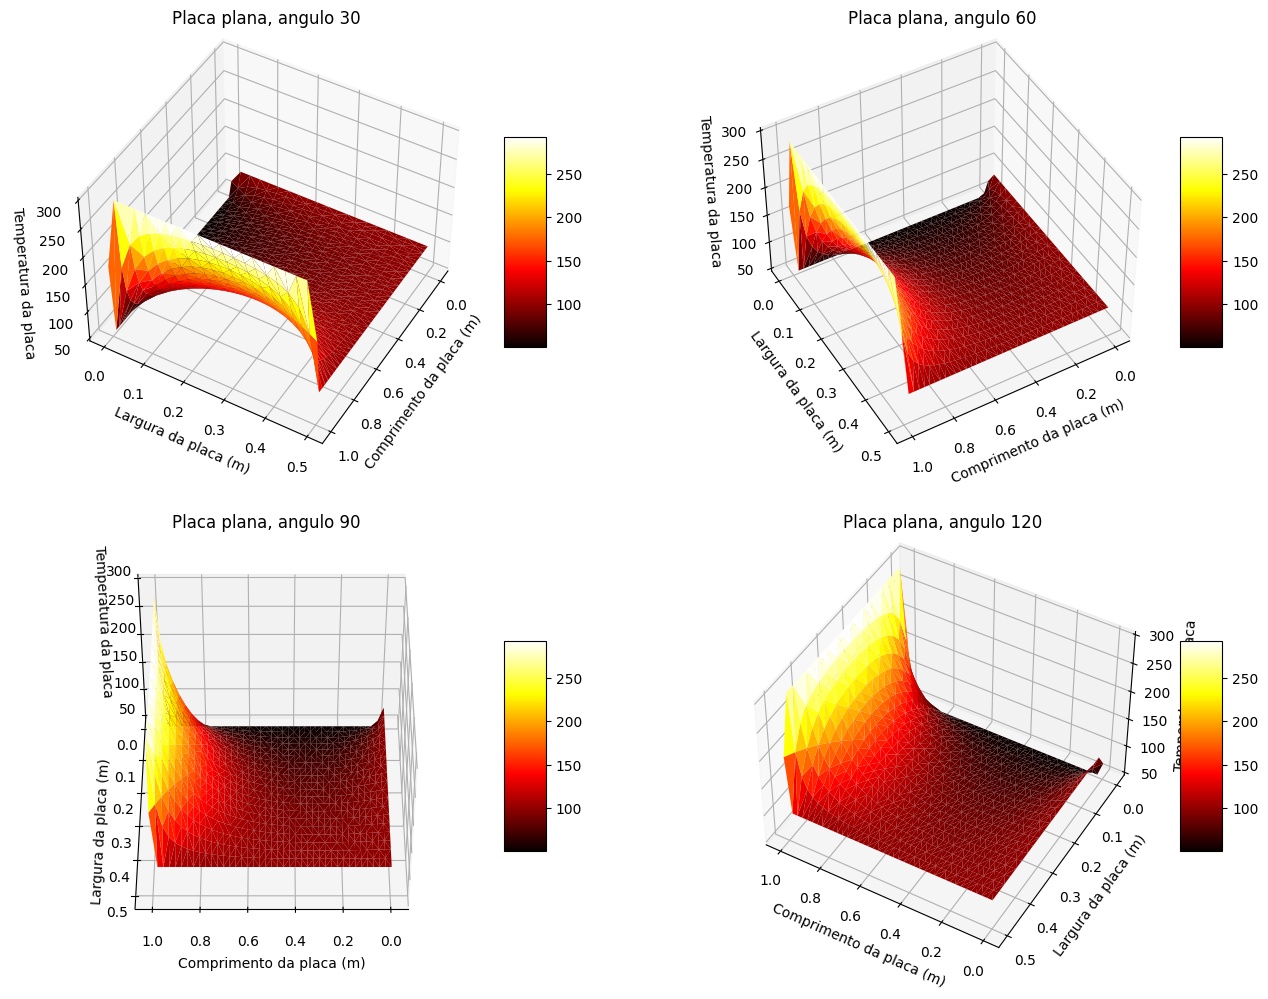

In [14]:
placa.plot_points(1)

A cor escolhida foi plasma


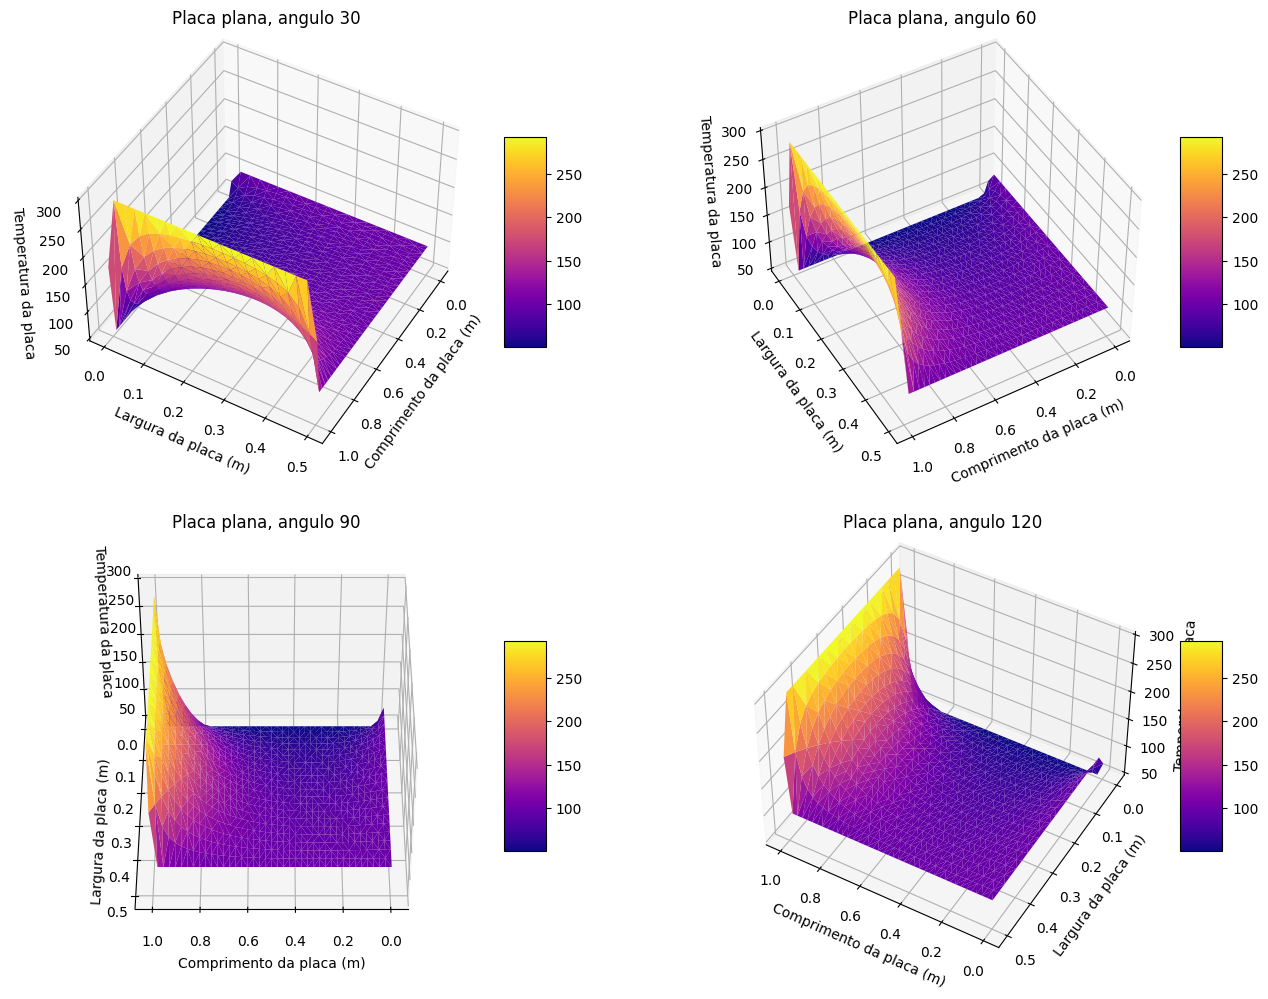

In [15]:
placa.plot_points(2)

A cor escolhida foi magma


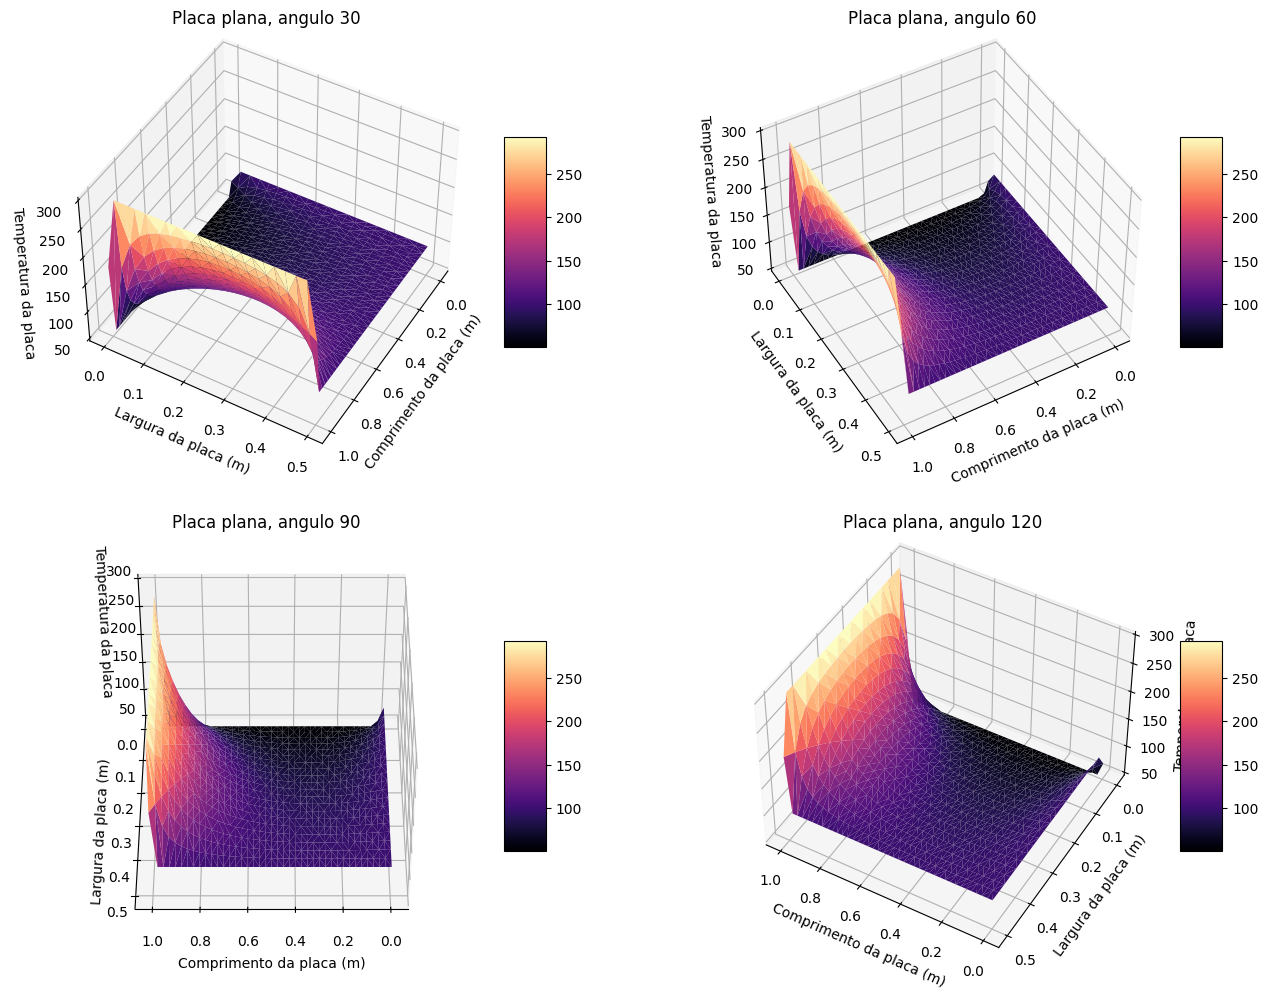

In [16]:
placa.plot_points(3)